In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

import pyvista as pv
pv.start_xvfb()
pv.set_jupyter_backend('static')

from rtmag.test.eval_single import self_eval
from rtmag.test.field_plot import create_mesh, mag_plotter
from rtmag.dataset.dataset_hnorm_unit_aug import ISEEDataset_Multiple_Hnorm_Unit_Aug, ISEEDataset_Hnorm_Unit_Aug

In [2]:
dataset_path = "/mnt/f/isee_dataset"
test_noaa = ["11158", "12673"]
test_path = "/mnt/f/isee_dataset/11158"
b_norm = 2500
batch_size = 1
num_workers = 4

In [3]:
train_dataset = ISEEDataset_Multiple_Hnorm_Unit_Aug(dataset_path, b_norm, test_noaa=test_noaa)
test_dataset = ISEEDataset_Hnorm_Unit_Aug(test_path, b_norm)

train_dataloder = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                            num_workers=num_workers, pin_memory=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, 
                            num_workers=num_workers, pin_memory=True)

In [4]:
len(train_dataset)

3744

In [5]:
idx = 30

In [6]:
batch_1 = train_dataset[idx]
batch_1['input_name']

'input_11176_20110328_000000'

In [7]:
batch_2 = train_dataset[idx+int(len(train_dataloder)/2)]
batch_2['input_name']

'input_11176_20110328_000000'

In [8]:
label_1 = batch_1['label']
label_1.shape

torch.Size([3, 512, 256, 256])

In [9]:
label_2 = batch_2['label']
label_2.shape

torch.Size([3, 512, 256, 256])

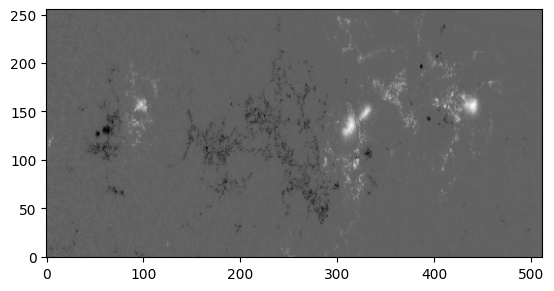

In [10]:
plt.imshow(label_1.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

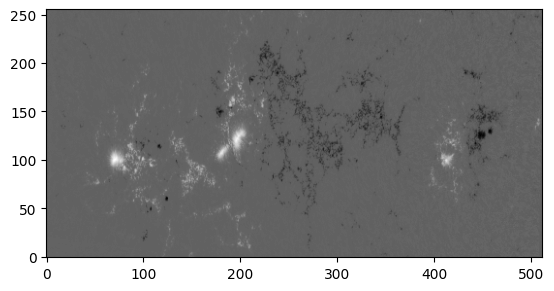

In [11]:
plt.imshow(label_2.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

In [12]:
inputs_1 = batch_1['input']
labels_1 = batch_1['label']
inputs_2 = batch_2['input']
labels_2 = batch_2['label']

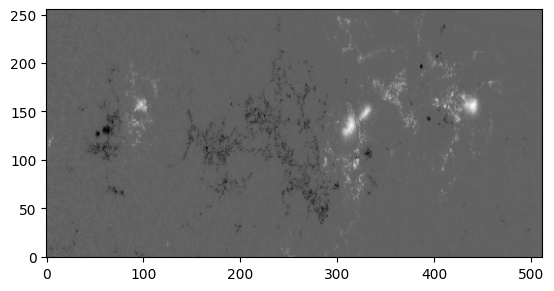

In [13]:
plt.imshow(inputs_1.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

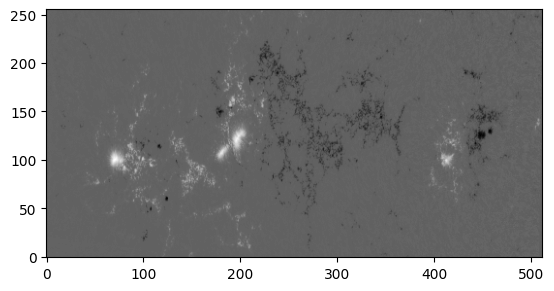

In [14]:
plt.imshow(inputs_2.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

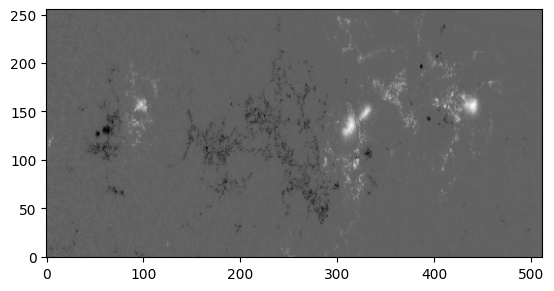

In [15]:
plt.imshow(labels_1.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

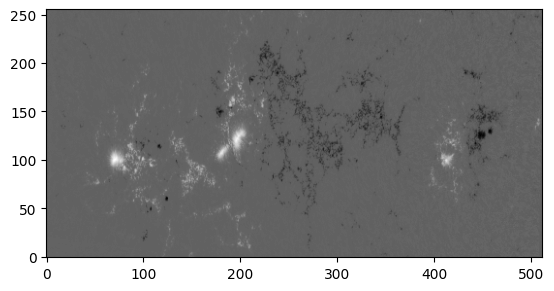

In [16]:
plt.imshow(labels_2.numpy()[2, :, :, 0].T, origin='lower', cmap='gray')

In [17]:
self_eval(labels_1.numpy().transpose(1, 2, 3, 0))

{'sig_J': 95.50675522594291,
 'L1': 0.00034238063,
 'L2': 0.00024530743,
 'L2n': 1.717451773583889,
 'angle': 78.916504,
 'theta_w': 72.75920485058613,
 'norm_div': 0.0171745}

In [18]:
self_eval(labels_2.numpy().transpose(1, 2, 3, 0))

{'sig_J': 95.50672678053104,
 'L1': 0.00034237962,
 'L2': 0.0002453079,
 'L2n': 1.71744916588068,
 'angle': 78.91664,
 'theta_w': 72.75915020907277,
 'norm_div': 0.01717447}

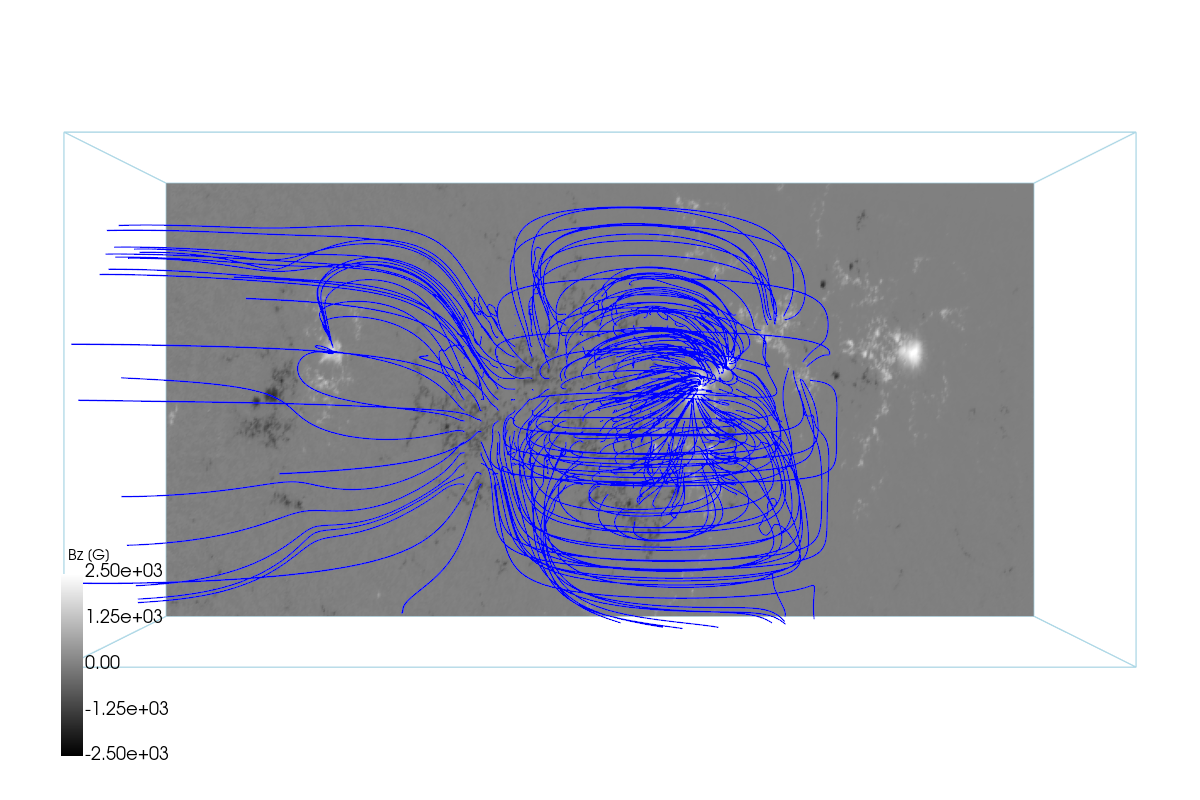

In [19]:
vmin=-2500
vmax=2500
i_siz=160
j_siz=100
i_res=16
j_res=16
window_size=(1200, 800)
zoom=1.5
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = labels_1.numpy()[0] * b_norm
by = labels_1.numpy()[1] * b_norm
bz = labels_1.numpy()[2] * b_norm
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottom, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)


p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = camera_position
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.show()

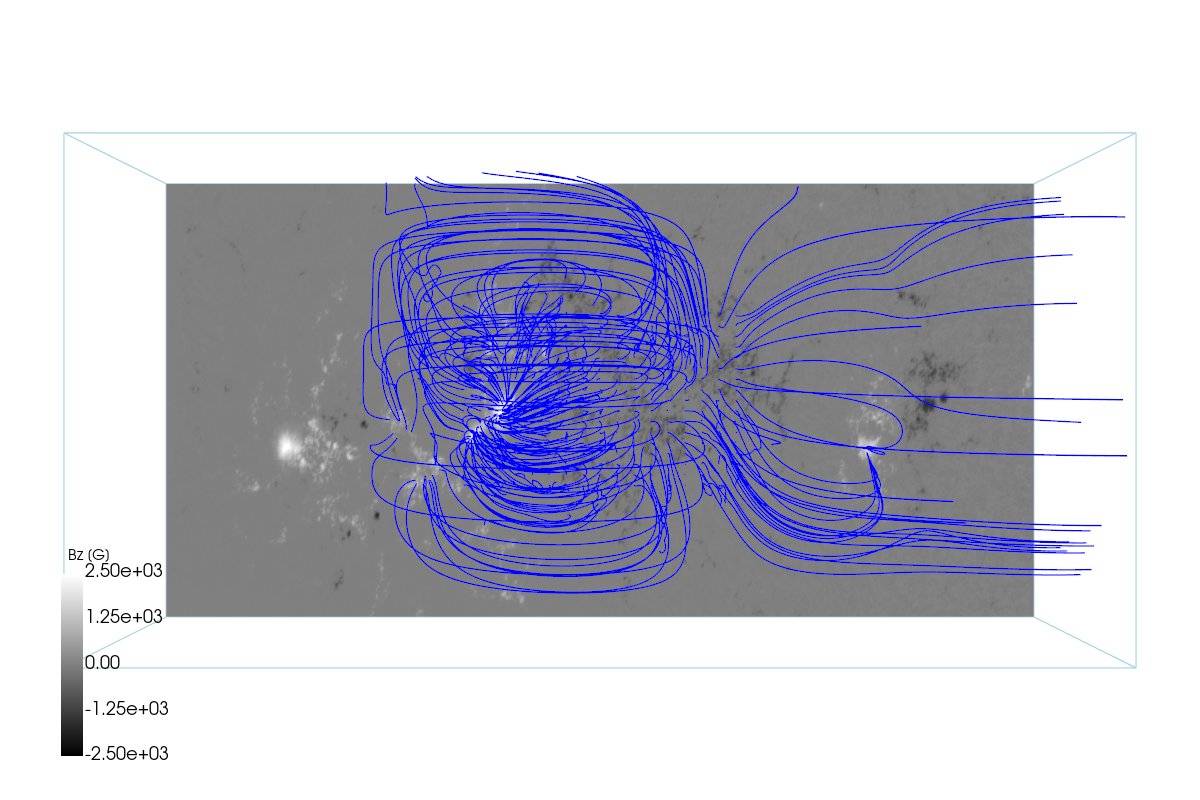

In [20]:
vmin=-2500
vmax=2500
i_siz=160
j_siz=100
i_res=16
j_res=16
window_size=(1200, 800)
zoom=1.5
max_time=10000
camera_position = 'xy'
b_title = ''
title_fontsize = 10

bx = labels_2.numpy()[0] * b_norm
by = labels_2.numpy()[1] * b_norm
bz = labels_2.numpy()[2] * b_norm
mesh = create_mesh(bx, by, bz)
b_plot = mag_plotter(mesh)
b_tube, b_bottom, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, i_resolution=i_res, j_resolution=j_res, vmin=vmin, vmax=vmax, max_time=max_time)


p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = camera_position
p.add_title(b_title, font_size=title_fontsize)
p.camera.zoom(zoom)
p.show()